# Pymaceuticals Inc. Analysis
---
##### <ins>[Weblink to Key Findings](https://github.com/Saurabh-Lakhanpal/matplotlib-challenge/blob/main/Report.md)</ins>

In [366]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [367]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Lets look at the data attributes and shape
print("Shape of the mouse metadata set is - ", mouse_metadata.shape)
print("---------------------------------------------------------------------------")
print("Shape of the study result set is - ", study_results.shape)

Shape of the mouse metadata set is -  (249, 5)
---------------------------------------------------------------------------
Shape of the study result set is -  (1893, 4)


In [368]:
# Combine the data into a single DataFrame
mouse_Study_Data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
print("Shape of the combined mouse study data set is - ", mouse_Study_Data.shape)
print("---------------------------------------------------------------------------")
mouse_Study_Data.head()

Shape of the combined mouse study data set is -  (1893, 8)
---------------------------------------------------------------------------


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [369]:
# Looking at the null values and other information of the merged data
mouse_Study_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [370]:
# Checking the number of mice and exploring the data
mouse_count = mouse_Study_Data["Mouse ID"].nunique()
print("Total Mice counts used for the study is", mouse_count)
print("---------------------------------------------------------------------------")
print("Drug regimens tested in the study-")
print(mouse_Study_Data["Drug Regimen"].unique())
print("---------------------------------------------------------------------------")
print("Timepoints when Tumors were measured-")
print(mouse_Study_Data["Timepoint"].unique())

Total Mice counts used for the study is 249
---------------------------------------------------------------------------
Drug regimens tested in the study-
['Capomulin' 'Ketapril' 'Naftisol' 'Infubinol' 'Stelasyn' 'Ramicane'
 'Propriva' 'Zoniferol' 'Placebo' 'Ceftamin']
---------------------------------------------------------------------------
Timepoints when Tumors were measured-
[ 0  5 10 15 20 25 30 35 40 45]


In [371]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicateIDs = mouse_Study_Data.loc[mouse_Study_Data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(duplicateIDs, "is/are the Mouse ID/s that have duplicates")

['g989'] is/are the Mouse ID/s that have duplicates


In [372]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates = mouse_Study_Data[mouse_Study_Data['Mouse ID'].isin(duplicateIDs)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [373]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
initial_row_count = len(mouse_Study_Data) 
mouse_Study_Data_clean = mouse_Study_Data[~mouse_Study_Data['Mouse ID'].isin(duplicateIDs)]
mouse_Study_Data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [374]:
# Checking the number of mice in the clean DataFrame.
final_row_count = len(mouse_Study_Data_clean) 
dropped_count = initial_row_count - final_row_count
print(f"Initial row count:", initial_row_count) 
print(f"Final row count after dropping duplicates:",final_row_count) 
print(f"Number of rows dropped:", dropped_count)
new_mouse_count = mouse_Study_Data_clean["Mouse ID"].nunique()
print("Total Mice counts used for the study is", new_mouse_count)

Initial row count: 1893
Final row count after dropping duplicates: 1880
Number of rows dropped: 13
Total Mice counts used for the study is 248


## Summary Statistics

In [375]:
# **ADDITIONAL STEP**
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_clean_stats = mouse_Study_Data_clean.describe()
mouse_study_clean_stats

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [376]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
    # mean, median, variance, standard deviation, and SEM of the tumor volume.
    # Assemble the resulting series into a single summary DataFrame.

drug_regimen_count = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].count()
drug_regimen_mean = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
drug_regimen_median = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
drug_regimen_var = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
drug_regimen_std = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
drug_regimen_SEM = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

drug_regimen_summary = pd.DataFrame({   "Tumor Vol. Count": drug_regimen_count,
                                        "Tumor Vol. Mean": drug_regimen_mean,
                                        "Tumor Vol. Median": drug_regimen_median,
                                        "Tumor Vol. Variance": drug_regimen_var,
                                        "Tumor Vol. Std.Deviation": drug_regimen_std,
                                        "Tumor Vol. SEM": drug_regimen_SEM
                                        })
drug_regimen_summary

,Tumor Vol. Count,Tumor Vol. Mean,Tumor Vol. Median,Tumor Vol. Variance,Tumor Vol. Std.Deviation,Tumor Vol. SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [377]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_agg = mouse_Study_Data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
drug_regimen_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

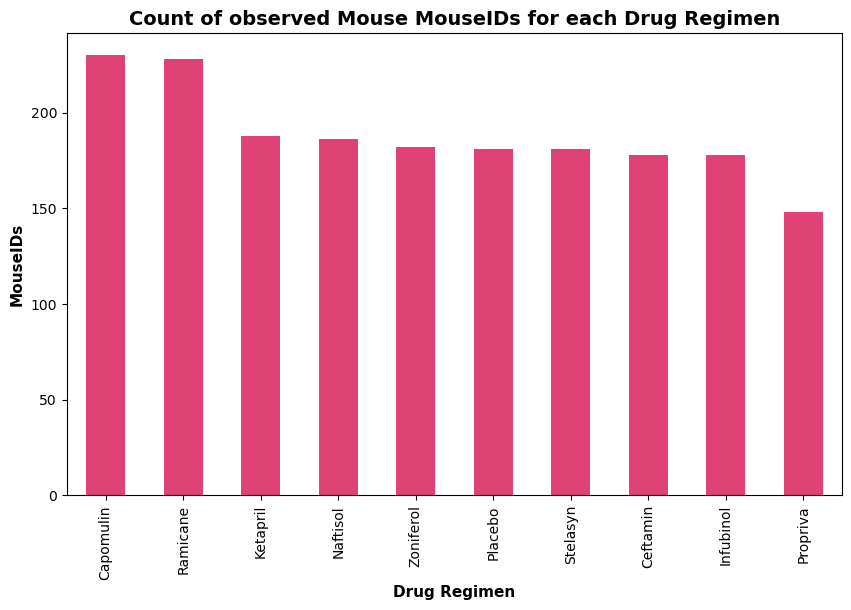

In [378]:
# Generate a bar plot showing the total number of rows Mouse ID for each drug regimen using Pandas.

drug_regimen_mouseID_count = mouse_Study_Data_clean.groupby(["Drug Regimen"])["Mouse ID"].count()
drug_regimen_mouseID_count=drug_regimen_mouseID_count.sort_values(ascending=False)
bar_plot = drug_regimen_mouseID_count.plot(kind="bar", color="#DF4375", figsize=(10, 6))

plt.title("Count of observed Mouse MouseIDs for each Drug Regimen",fontsize=14,fontweight='bold')

plt.xlabel("Drug Regimen", fontsize=11,fontweight='bold')
plt.ylabel("MouseIDs", fontsize=11,fontweight='bold')

plt.show()

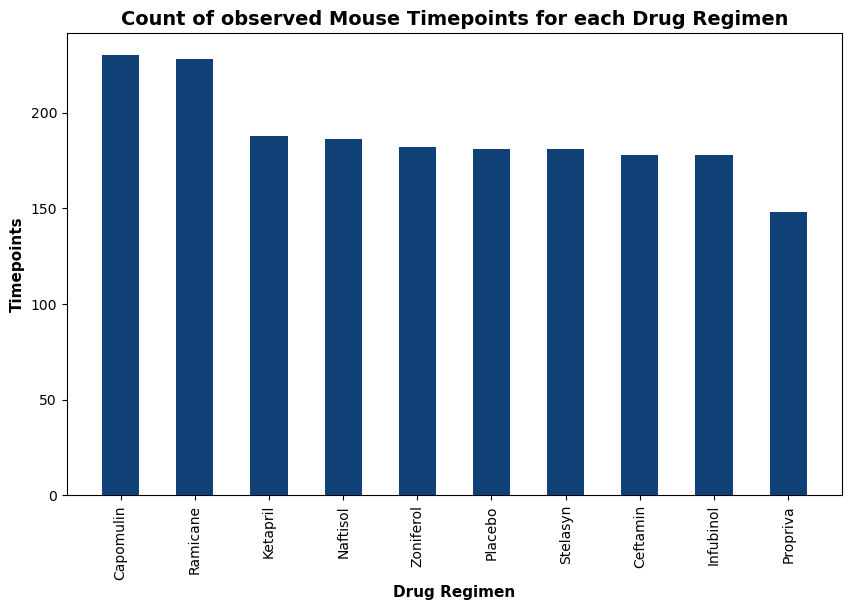

In [379]:
# Create an array for timepoints
drug_regimen_timepoint_count = mouse_Study_Data_clean.groupby(["Drug Regimen"])["Timepoint"].count()

# Sort the Series by values
drug_regimen_timepoint_count_sorted = drug_regimen_timepoint_count.sort_values(ascending=False)

# Bar pyplot
x_axis = drug_regimen_timepoint_count_sorted.index

fig1, ax1 = plt.subplots(figsize=(10, 6))

plt.bar(x_axis, drug_regimen_timepoint_count_sorted, color='#104176', width=0.5)

plt.xticks(rotation='vertical')
plt.title("Count of observed Mouse Timepoints for each Drug Regimen", fontsize=14, fontweight='bold')
plt.xlabel("Drug Regimen", fontsize=11, fontweight='bold')
plt.ylabel("Timepoints", fontsize=11, fontweight='bold')

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

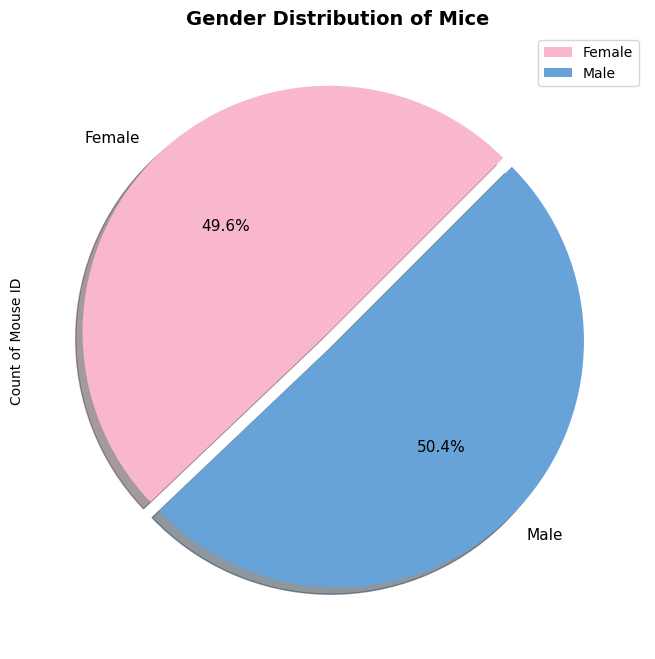

In [380]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_distribution_pd = mouse_Study_Data_clean.groupby("Sex")["Mouse ID"].nunique()

# Define colors for each slice
colors = ["#F8B7CD","#67A3D9"]

# Make the pie chart
gender_distribution_pd.plot(kind='pie',
                            autopct='%1.1f%%',
                            figsize=(8, 8),
                            legend=True,
                            fontsize=11,
                            colors=colors,
                            shadow=True,
                            explode=(0.05,0),
                            startangle=45,
                            ylabel=("Count of Mouse ID")
                            )

plt.title("Gender Distribution of Mice",fontsize=14,fontweight='bold')
plt.show

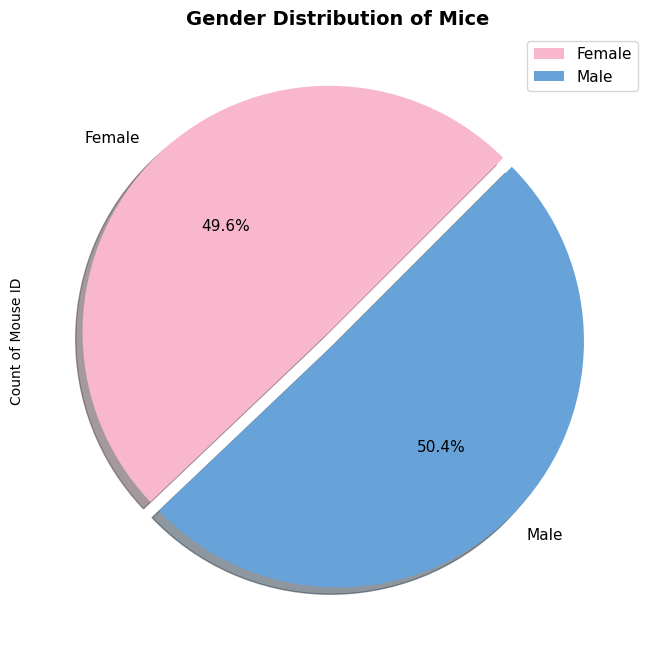

In [381]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_distribution_py = mouse_Study_Data_clean.groupby("Sex")["Mouse ID"].nunique()

# Define colors for each slice
colors = ["#F8B7CD","#67A3D9"]

# Make the pie chart
# Create a figure with subplots
fig, ax = plt.subplots(figsize=(8,8))

# Create a pie chart in the first subplot
wedges, texts, autotexts = ax.pie(gender_distribution_py, 
                                  colors=colors, 
                                  autopct='%1.1f%%', 
                                  startangle=45, 
                                  shadow=True, 
                                  explode=(0.05, 0),
                                  labels=gender_distribution_py.index
                                  )

# Customize font sizes 
for text in texts: 
    text.set_fontsize(11) 
# Set font size for labels 
for autotext in autotexts: 
    autotext.set_fontsize(11)

ax.set_ylabel("Count of Mouse ID")
ax.set_title("Gender Distribution of Mice",fontsize=14,fontweight='bold')
ax.legend(gender_distribution_py.index, loc="upper right",fontsize=11)
plt.show()

## Quartiles, Outliers and Boxplots

In [382]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = mouse_Study_Data_clean.groupby('Mouse ID')['Timepoint'].max().reset_index().rename(columns={"Timepoint": "max_Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_df = pd.merge(mouse_Study_Data_clean, last_timepoint_df, left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'max_Timepoint'])

# Display results
final_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_Timepoint
0,f932,0,45.000000,0,Ketapril,Male,15,29,0
1,x336,0,45.000000,0,Naftisol,Female,4,29,0
2,h428,0,45.000000,0,Ketapril,Female,1,27,0
3,v199,0,45.000000,0,Naftisol,Female,17,29,0
4,o848,0,45.000000,0,Stelasyn,Female,14,27,0
...,...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25,45
244,u364,45,31.023923,3,Capomulin,Male,18,17,45
245,p438,45,61.433892,1,Ceftamin,Female,11,26,45
246,x773,45,58.634971,4,Placebo,Female,21,30,45


In [383]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in drug_treatments_list:
    subset = final_timepoint_df[final_timepoint_df['Drug Regimen'] == treatment]
    
    q1 = np.percentile(subset['Tumor Volume (mm3)'], 25)
    q3 = np.percentile(subset['Tumor Volume (mm3)'], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]
    
    # Add tumor volume values to the list for plotting
    tumor_volume_values.append(subset['Tumor Volume (mm3)'])
    
    # Print the treatment and the number of outliers
    print(f"Treatment: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("=======================================")


Treatment: Capomulin
IQR: 7.781863460000004
Number of outliers: 0
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Treatment: Ramicane
IQR: 9.098536719999998
Number of outliers: 0
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Treatment: Infubinol
IQR: 11.477135160000003
Number of outliers: 1
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Treatment: Ceftamin
IQR: 15.577752179999997
Number of outliers: 0
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999


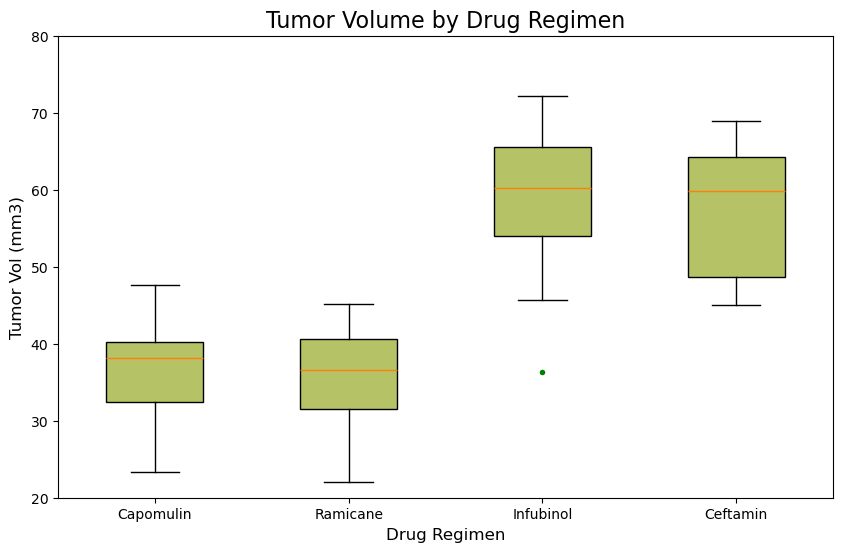

In [384]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
# Show outliers on boxplot for visibility
outlier_design = dict(marker="o", markerfacecolor="green", markersize=5, markeredgecolor="white")

# Create Boxplot
plt.figure(figsize=(10, 6)) 
plt.boxplot(tumor_volume_values, widths=0.5, patch_artist=True, boxprops=dict(facecolor="#B5C266"), flierprops=outlier_design)
plt.title('Tumor Volume by Drug Regimen', fontsize= 16)
plt.xlabel('Drug Regimen', fontsize=12) 
plt.ylabel('Tumor Vol (mm3)', fontsize=12)

plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
# plt.xlim(-0.95, len(x_axis)+2)
plt.ylim(20, 80)

plt.show()

## Line and Scatter Plots

In [385]:
# Creating the data frames for each drug regimen and store the names in a list for future analysis
# Get unique regimens
regimens = mouse_Study_Data_clean['Drug Regimen'].unique()

# Create a list to store the names of the DataFrames
df_names = []

# Create DataFrames with dynamic names and store the names in the list
for regimen in regimens:
    df_name = f"{regimen}_df"
    globals()[df_name] = mouse_Study_Data_clean[mouse_Study_Data_clean['Drug Regimen'] == regimen]
    df_names.append(df_name)
    print(df_name)

Capomulin_df
Ketapril_df
Naftisol_df
Infubinol_df
Stelasyn_df
Ramicane_df
Zoniferol_df
Propriva_df
Placebo_df
Ceftamin_df


In [386]:
Capomulin_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


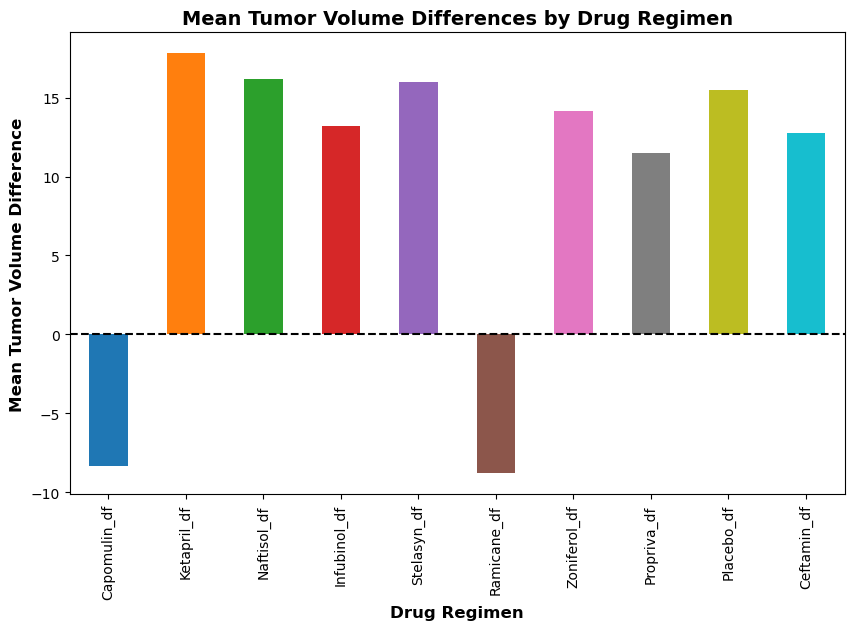

In [387]:
# Create a dictionary to store the tumor volume differences for each drug regimen 
tumor_volume_differences = {} 

# Loop through the list of DataFrame names 
for df_name in df_names:
    # Get the DataFrame using the name 
    df = globals()[df_name] 
    # Get the last (greatest) timepoint for each mouse 
    max_timepoint_df = df.groupby('Mouse ID')['Timepoint'].max().reset_index().rename(columns={"Timepoint": "max_Timepoint"}) 
    # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint 
    max_timepoint_df = pd.merge(df, max_timepoint_df, left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'max_Timepoint']) 
    # Calculate the tumor volume difference for each mouse 
    max_timepoint_df['Tumor Volume Difference'] = max_timepoint_df['Tumor Volume (mm3)'] - 45
    # Store the tumor volume differences in the dictionary 
    tumor_volume_differences[df_name] = max_timepoint_df['Tumor Volume Difference'].dropna().values 

# Calculate the mean value for each tumor volume difference
mean_tumor_volume_differences = {regimen: np.mean(differences) for regimen, differences in tumor_volume_differences.items()}

# Convert the dictionary to a Pandas Series for easy plotting
mean_tumor_volume_differences_series = pd.Series(mean_tumor_volume_differences)

# Define colors for each bar
colors = plt.cm.tab10(np.linspace(0, 1, len(mean_tumor_volume_differences_series)))

# Plot a bar graph of the mean tumor volume differences with different colors
plt.figure(figsize=(10, 6))
mean_tumor_volume_differences_series.plot(kind='bar', color=colors)
plt.title('Mean Tumor Volume Differences by Drug Regimen', fontsize=14, fontweight='bold')
plt.xlabel('Drug Regimen', fontsize=12, fontweight='bold')
plt.ylabel('Mean Tumor Volume Difference', fontsize=12, fontweight='bold')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()


In [388]:

# Selecting a mouse ID with maximum tumor reduction with in the Capomulin drug regimen to line plot

# Filter the DataFrame for the "Capomulin" drug regimen
capomulin_df = mouse_Study_Data_clean[mouse_Study_Data_clean["Drug Regimen"] == "Capomulin"]

# Filter the DataFrame for rows where the timepoint is 45
capomulin_tp45 = capomulin_df.loc[capomulin_df["Timepoint"] == 45]

# Filter the DataFrame for rows where the timepoint is 0
capomulin_tp0 = capomulin_df.loc[capomulin_df["Timepoint"] == 0]

# Merge the DataFrames on "Mouse ID"
capomulin_tp0_tp45 = pd.merge(capomulin_tp0, capomulin_tp45, on="Mouse ID", suffixes=('_0', '_45'))

# Calculate the difference in tumor volume between the two timepoints
capomulin_tp0_tp45["Tumor Volume Difference"] = capomulin_tp0_tp45["Tumor Volume (mm3)_0"] - capomulin_tp0_tp45["Tumor Volume (mm3)_45"]

# Identify the mouse ID with the maximum difference
max_diff_mouse_id = capomulin_tp0_tp45.loc[capomulin_tp0_tp45["Tumor Volume Difference"].idxmax(), "Mouse ID"]
max_diff_value = capomulin_tp0_tp45.loc[capomulin_tp0_tp45["Tumor Volume Difference"].idxmax(), "Tumor Volume Difference"]

print("Selecting Mouse ID",max_diff_mouse_id,"with the maximum tumor volume difference of",max_diff_value,"between timepoints 0 and 45, to plot the Graph")

Selecting Mouse ID s185 with the maximum tumor volume difference of 21.65640213 between timepoints 0 and 45, to plot the Graph


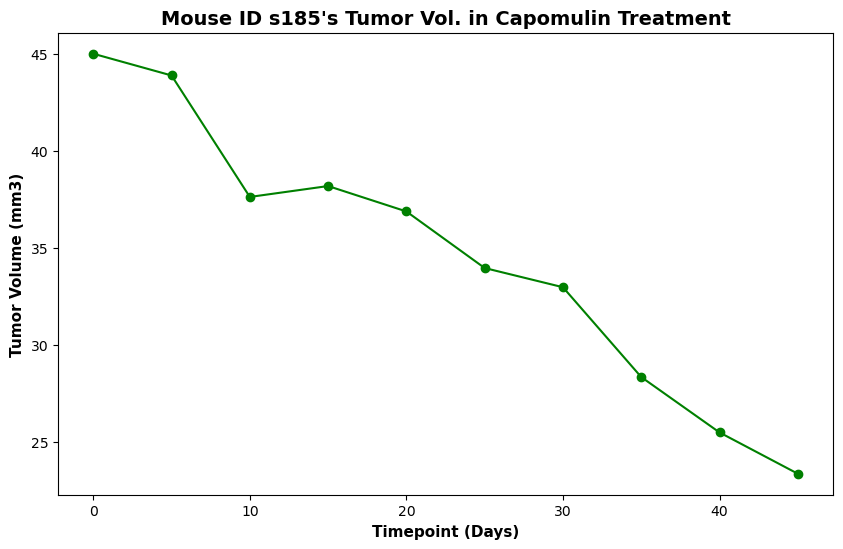

In [389]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Identify specific mouse ID and get data of the mouse id
mouse_id = max_diff_mouse_id
Capomulin_plot = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]

# Generate a line plot
plt.figure(figsize=(10,6))
time_vol = plt.plot(Capomulin_plot['Timepoint'], Capomulin_plot['Tumor Volume (mm3)'], marker='o', color='Green')

# Set x/y label, title
plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold',fontsize=14)
plt.xlabel('Timepoint (Days)', fontweight='bold',fontsize=11)
plt.ylabel('Tumor Volume (mm3)', fontweight='bold',fontsize=11)

# Present the box plot chart
plt.show()


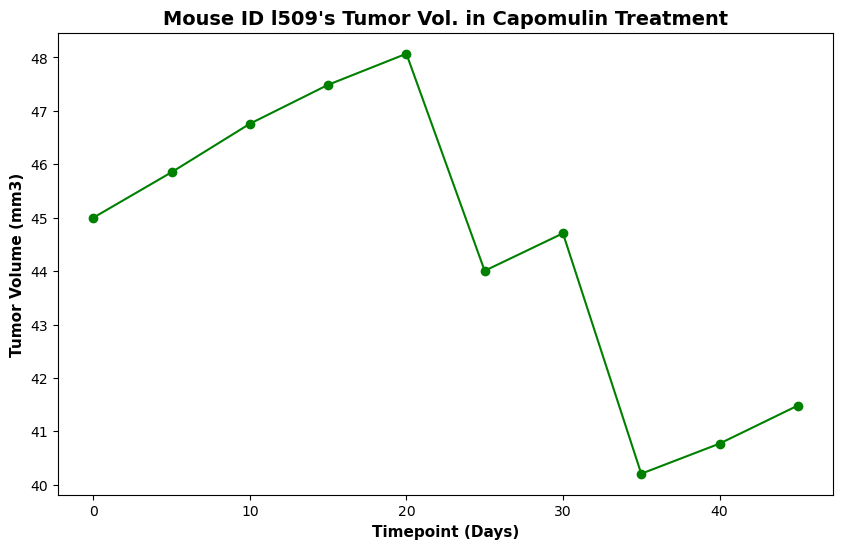

In [390]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Identify specific mouse ID and get data of the mouse id
mouse_id = "l509"
Capomulin_plot = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]

# Generate a line plot
plt.figure(figsize=(10,6))
time_vol = plt.plot(Capomulin_plot['Timepoint'], Capomulin_plot['Tumor Volume (mm3)'], marker='o', color='Green')

# Set x/y label, title
plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold',fontsize=14)
plt.xlabel('Timepoint (Days)', fontweight='bold',fontsize=11)
plt.ylabel('Tumor Volume (mm3)', fontweight='bold',fontsize=11)

# Present the box plot chart
plt.show()

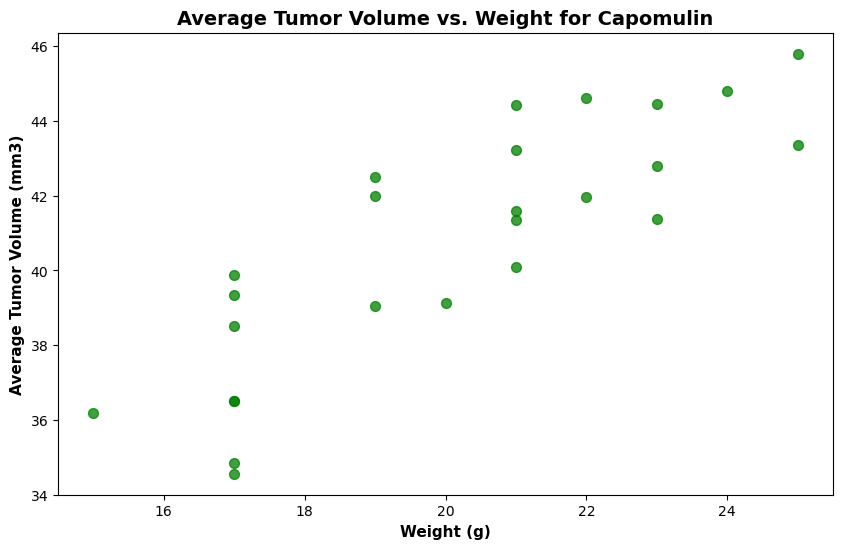

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22.0,41.963636
1,b742,21.0,40.083699
2,f966,17.0,36.505973
3,g288,19.0,41.990097
4,g316,22.0,44.613344
5,i557,24.0,44.805810
6,i738,20.0,39.141053
7,j119,23.0,44.465236
8,j246,21.0,43.216925
9,l509,21.0,44.434474


In [391]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate average tumor volume per weight group
avg_wgt_tum_vol_cap = capomulin_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# Create the scatter plot
# Set figure size
plt.figure(figsize=(10, 6)) 

# Customize plot
plt.scatter(avg_wgt_tum_vol_cap['Weight (g)'], avg_wgt_tum_vol_cap['Tumor Volume (mm3)'], s=50, c='green', alpha=0.75)  

# Add labels and title
plt.xlabel('Weight (g)',fontweight='bold',fontsize=11)
plt.ylabel('Average Tumor Volume (mm3)',fontweight='bold',fontsize=11)
plt.title('Average Tumor Volume vs. Weight for Capomulin',fontweight='bold',fontsize=14)

# Display the plot
plt.show()

avg_wgt_tum_df = pd.DataFrame(avg_wgt_tum_vol_cap)

# Dispay Dataframe
avg_wgt_tum_df

# Rese the index of the dataframe
new_index_avg_wgt_df = avg_wgt_tum_df.reset_index()

# Display new index dataframe
new_index_avg_wgt_df

## Correlation and Regression

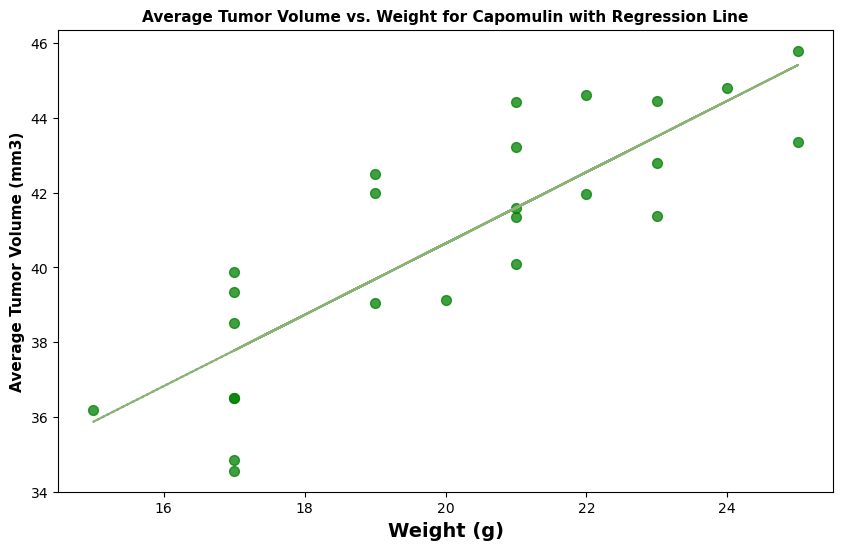

Slope (m): 0.9544396890241048
Y-intercept (b): 21.552160532685
Standard error of the estimate (SE): 1.788523170768337
R-squared: 0.7088568047708719
P-value: 0.999999999999975
Linear Equation: y = 0.9544396890241048(X) + 21.552160532685


In [392]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the linear regression line
m, b = np.polyfit(avg_wgt_tum_vol_cap['Weight (g)'], avg_wgt_tum_vol_cap['Tumor Volume (mm3)'], 1)

# Create the scatter plot
plt.figure(figsize=(10, 6)) 

# Customize plot
plt.scatter(avg_wgt_tum_vol_cap['Weight (g)'], avg_wgt_tum_vol_cap['Tumor Volume (mm3)'], s=50, c='green', alpha=0.75)  

# Plot the regression line
plt.plot(avg_wgt_tum_vol_cap['Weight (g)'], m * avg_wgt_tum_vol_cap['Weight (g)'] + b, color='#89B374', linestyle='--')

# Add labels and title
plt.xlabel('Weight (g)', fontweight='bold', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold', fontsize=11)
plt.title('Average Tumor Volume vs. Weight for Capomulin with Regression Line', fontweight='bold', fontsize=11)

# Display the plot
plt.show()

# Calculate residuals
residuals = avg_wgt_tum_vol_cap['Tumor Volume (mm3)'] - (m * avg_wgt_tum_vol_cap['Weight (g)'] + b)

# Calculate standard error of the estimate (SSE)
sse = np.sum(residuals**2)

# Calculate degrees of freedom
df_freedom = len(avg_wgt_tum_vol_cap) - 2  # 2 for slope and intercept

# Calculate mean squared error (MSE)
mse = sse / df_freedom

# Calculate standard error of the estimate (SE)
se = np.sqrt(mse)

# Calculate r-squared
r_squared = 1 - (sse / np.sum((avg_wgt_tum_vol_cap['Tumor Volume (mm3)'] - avg_wgt_tum_vol_cap['Tumor Volume (mm3)'].mean())**2))

# Calculate p-value
t_stat, p_value = stats.ttest_rel(avg_wgt_tum_vol_cap['Tumor Volume (mm3)'], (m * avg_wgt_tum_vol_cap['Weight (g)'] + b))

# Print results
print(f"Slope (m): {m}")
print(f"Y-intercept (b): {b}")
print(f"Standard error of the estimate (SE): {se}")
print(f"R-squared: {r_squared}")
print(f"P-value: {p_value}")
print(f"Linear Equation: y = {m}(X) + {b}")


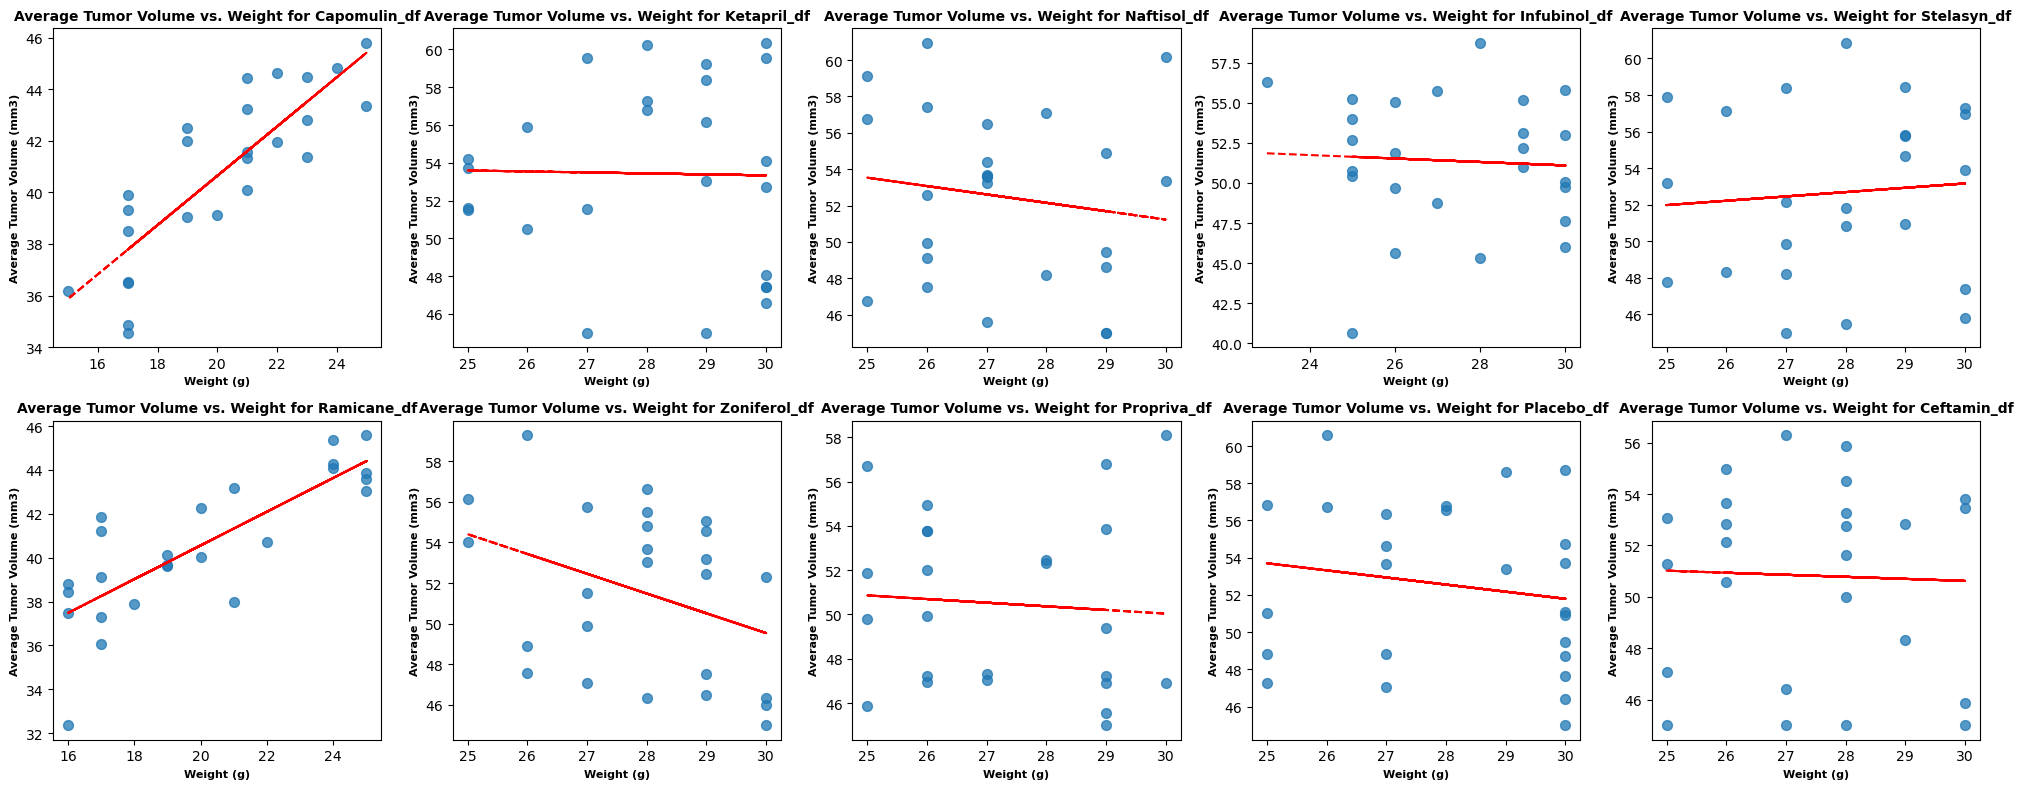

In [393]:
# Plotting regression slopes for all drugs
# Calculate average tumor volume per weight group for each drug regimen
avg_tumor_volumes_per_weight = {}

for df_name in df_names:
    avg_tumor_volumes_per_weight[df_name] = globals()[df_name].groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
# Create a grid of plots with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each drug regimen in a separate subplot
for i, (df_name, avg_tumor_vol) in enumerate(avg_tumor_volumes_per_weight.items()):
    # Calculate the linear regression line
    m, b = np.polyfit(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'], 1)
    
    # Create the scatter plot
    axes[i].scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'], s=50, alpha=0.75)
    axes[i].plot(avg_tumor_vol['Weight (g)'], m * avg_tumor_vol['Weight (g)'] + b, linestyle='--', color='red')
    
    # Add labels and title
    axes[i].set_title(f'Average Tumor Volume vs. Weight for {df_name}', fontsize=10, fontweight='bold')
    axes[i].set_xlabel('Weight (g)', fontsize=8, fontweight='bold')
    axes[i].set_ylabel('Average Tumor Volume (mm3)', fontsize=8, fontweight='bold')

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [394]:
# Create a list to store the regression results
regression_results = []

# Calculate regression statistics for each drug regimen
for df_name, avg_tumor_vol in avg_tumor_volumes_per_weight.items():
    # Calculate the linear regression line
    m, b = np.polyfit(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'], 1)
    
    # Calculate residuals
    residuals = avg_tumor_vol['Tumor Volume (mm3)'] - (m * avg_tumor_vol['Weight (g)'] + b)
    
    # Calculate standard error of the estimate (SSE)
    sse = np.sum(residuals**2)
    
    # Calculate degrees of freedom
    df_freedom = len(avg_tumor_vol) - 2  # 2 for slope and intercept
    
    # Calculate mean squared error (MSE)
    mse = sse / df_freedom
    
    # Calculate standard error of the estimate (SE)
    se = np.sqrt(mse)
    
    # Calculate r-squared
    r_squared = 1 - (sse / np.sum((avg_tumor_vol['Tumor Volume (mm3)'] - avg_tumor_vol['Tumor Volume (mm3)'].mean())**2))
    
    # Calculate p-value
    t_stat, p_value = st.ttest_rel(avg_tumor_vol['Tumor Volume (mm3)'], (m * avg_tumor_vol['Weight (g)'] + b))
    
    # Linear equation
    linear_eq = f"y = {m:.2f}x + {b:.2f}"
    
    # Append results to the list
    regression_results.append({
        'Drug Regimen': df_name,
        'Slope (m)': m,
        'Y-intercept (b)': b,
        'Standard error (SE)': se,
        'R-squared': r_squared,
        'P-value': p_value,
        'Linear Equation': linear_eq
    })

# Create a DataFrame from the regression results
regression_df = pd.DataFrame(regression_results)

# Display the DataFrame
regression_df


,Drug Regimen,Slope (m),Y-intercept (b),Standard error (SE),R-squared,P-value,Linear Equation
0,Capomulin_df,0.954440,21.552161,1.788523,0.708857,1.0,y = 0.95x + 21.55
1,Ketapril_df,-0.051865,54.888901,5.012376,0.000390,1.0,y = -0.05x + 54.89
2,Naftisol_df,-0.460682,65.048363,4.833214,0.021853,1.0,y = -0.46x + 65.05
3,Infubinol_df,-0.108176,54.338802,4.251866,0.003182,1.0,y = -0.11x + 54.34
4,Stelasyn_df,0.236766,46.062458,4.794693,0.007112,1.0,y = 0.24x + 46.06
5,Ramicane_df,0.769625,25.163492,1.936313,0.649684,1.0,y = 0.77x + 25.16
6,Zoniferol_df,-0.974589,78.773470,3.899520,0.131679,1.0,y = -0.97x + 78.77
7,Propriva_df,-0.164629,54.976572,4.031920,0.005199,1.0,y = -0.16x + 54.98
8,Placebo_df,-0.382086,63.254295,4.459329,0.028215,1.0,y = -0.38x + 63.25
9,Ceftamin_df,-0.079642,53.009677,3.825207,0.001280,1.0,y = -0.08x + 53.01
